### robots.txt

- 로봇 배제 표준
    - 어떤 페이지의 접근 권한이 허가되고 금지되는 지 텍스트 파일로 기록
- 강제성이 있는 것이 아님 -> 공격으로 간주되어 차단될 수 있으니 조심하자

- 웹페이지의 루트에 위치

- **User-agent** : 누구 / 어떤 로봇에 규칙이 적용되는지 지정
    - <p>* : (와일드카드) 모든 봇에 대해 적용됨</p>

- **Disallow** : 접근을 금지할 웹 페이지
    - <p> / : 전체 웹 페이지 </p>

- **Allow** : 접근을 금지할 웹페이지
    - <p> /$ : 루트 (메인, 첫) 페이지

    -> 크롤링을 금지하지만 메인페이지는 예외적으로 허용!

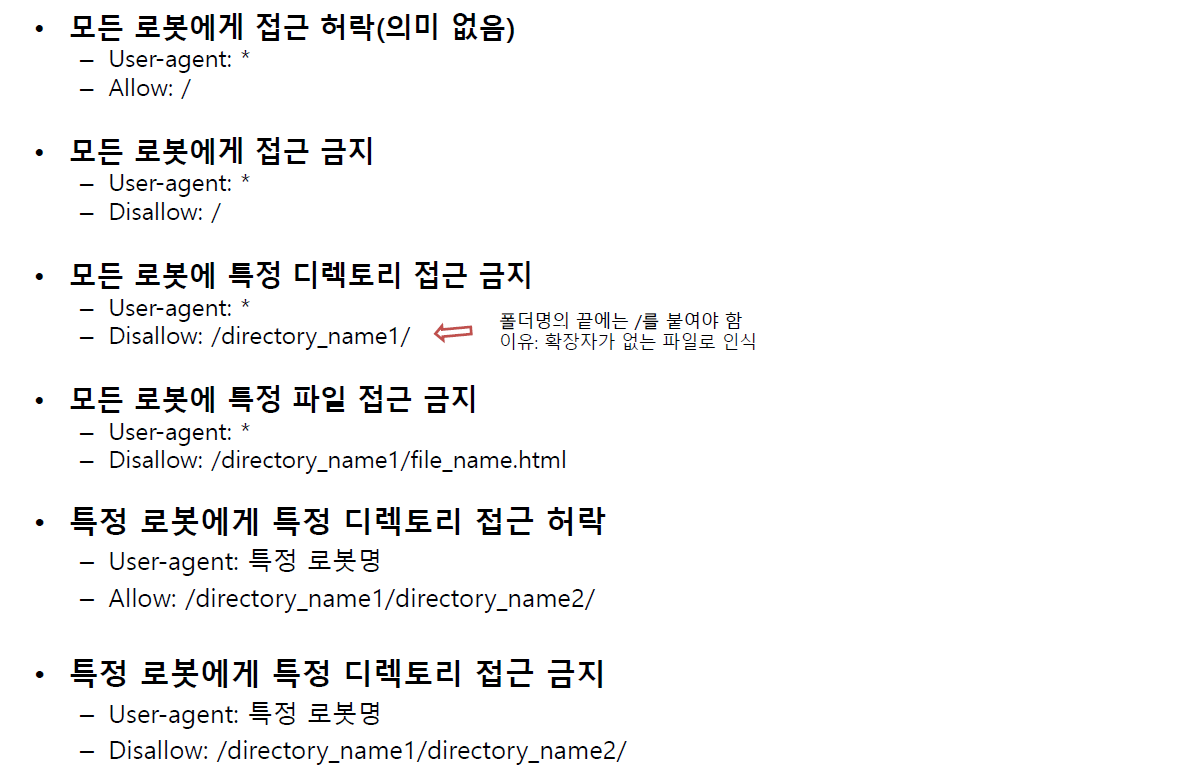


### urllib 활용하기
1. urllib 으로 네이버 메인 페이지 데이터 받아오기
    - http request 라는 요청을 웹 데이터를 받아와야함
        - urllib.request : 파이썬에서 웹의 특정 주소로 요청을 보내는 기능
        - urllib.request 의 urlopen() 함수를 이용하여 네이버 첫 페이지 불러오기

b'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\
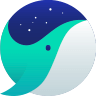
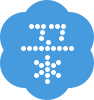

In [1]:
from urllib.request import urlopen

url = "https://www.naver.com"
html = urlopen(url)   # BeautifulSoup 의 utml_str 과 같은 역할

print(html.read())

- 네이버 첫 페이지를 받아오면, html 변수안에 네이버 첫 페이지를 호출한 데이터가 문자열 형태로 들어감

</br>
2. Beautifulsoup() 에 데이터 넣기

    - urlopen()을 이용하여 URL을 호출한 데이터를 받아 옴
    - 이 데이터를 파싱하기 위해 BeautisfulSoup()에 데이터를 넣어 파이썬에서 가공할 수 있는 형태로 만들어 주어야함


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
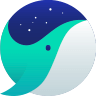
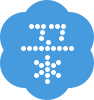

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = "https://www.naver.com"
html = urlopen(url)

soup = BeautifulSoup(html.read(), "html.parser")

print(soup)  # 어떤 부분이 태그인지 

In [3]:
result = soup.find("div",{"class":"service_area"})  # class 속성을 이용하여 찾음
print(result)

<div class="service_area">
<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>
<i class="sa_bar"></i>
<a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>
<a class="link_happybin" data-clk="top.happybean" href="https://happybean.naver.com"><i class="ico_happybin"></i><span class="blind">해피빈</span></a>
</div>


In [4]:
a_result = result.find("a") # 우리가 찾으려는 태그(a태그)가 처음에 나오므로 속성 안줘도 됨
print(a_result)

<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>


In [6]:
print(a_result.text)

네이버를 시작페이지로


In [5]:
# 혹은 <a> 태그와 id활용
result2 = soup.find("a",{"id": "NM_set_home_btn"})
print(result2.text)

네이버를 시작페이지로


## 마무리
- www.naver.com/robots.txt

- urllib으로 네이버 메인 페이지 데이터 받아오기
    - url.request 의 urlopen() 함수 이용

- BeautifulSoup()에 데이터 넣기

- 필요한 부분만 가져오기
    - 크롬 개발자 도구 이용
    
- find() & class 속성 활용하기

- .text 를 이용하여 글자만 가져오기